# Loan Approval Intelligence Suite

# Task 1: Load SQL-exported data using pandas

In [50]:
import pandas as pd
import glob

In [51]:
df1 = pd.read_csv('query1.csv')
df2 = pd.read_csv('query2.csv')
df3 = pd.read_csv('query3.csv')
df4 = pd.read_csv('query4.csv')
df5 = pd.read_csv('query5.csv')
df6 = pd.read_csv('query6.csv')
df7 = pd.read_csv('query8.csv')
df8 = pd.read_csv('query9.csv')
df9 = pd.read_csv('query10.csv')

In [52]:
list_of_dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

# Task 2: Perform EDA: histograms, boxplots, correlation matrix

In [53]:
# 1. Collect all unique column names
all_columns = set()
for df in list_of_dfs:
    all_columns.update(df.columns)
    
print(f"All unique columns found: {sorted(list(all_columns))}")

# 2. Iterate through the list and add missing columns to each DataFrame
standardized_dfs = []
for df in list_of_dfs:
    # Add missing columns with pd.NA (Pandas' dedicated missing value indicator)
    for col in all_columns:
        if col not in df.columns:
            df[col] = pd.NA
    
    # Reorder columns consistently 
    df = df[sorted(list(all_columns))]
    standardized_dfs.append(df)

All unique columns found: ['Approval_Rate_Percent', 'Approved', 'Column1', 'Education', 'Loan_Status', 'Risk_Level', 'Total_Applications', 'Total_Approved', 'Total_Count', 'Total_Rejected', 'avg_cibil_score', 'avg_income', 'avg_loan_amount', 'income_annum', 'income_rank', 'loan_amount', 'loan_id', 'loan_status', 'no_of_dependents', 'self_employed', 'total_applicants', 'total_assets']


In [54]:
# Concatenate the standardized DataFrames
master_df = pd.concat(standardized_dfs, ignore_index=True)

# Confirm it worked
print(f"master_df created successfully with shape: {master_df.shape}")
print(master_df.info())

C:\Users\HP\AppData\Local\Temp\ipykernel_29760\2989106223.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  master_df = pd.concat(standardized_dfs, ignore_index=True)


master_df created successfully with shape: (12796, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12796 entries, 0 to 12795
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Approval_Rate_Percent  3 non-null      float64
 1   Approved               2 non-null      object 
 2   Column1                0 non-null      object 
 3   Education              2 non-null      object 
 4   Loan_Status            2 non-null      object 
 5   Risk_Level             4269 non-null   object 
 6   Total_Applications     3 non-null      object 
 7   Total_Approved         1 non-null      object 
 8   Total_Count            2 non-null      object 
 9   Total_Rejected         1 non-null      object 
 10  avg_cibil_score        2 non-null      float64
 11  avg_income             8 non-null      float64
 12  avg_loan_amount        6 non-null      float64
 13  income_annum           12783 non-null  object 
 14 

In [55]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

In [56]:
# Set aesthetic styles for plots
sns.set_style("whitegrid")

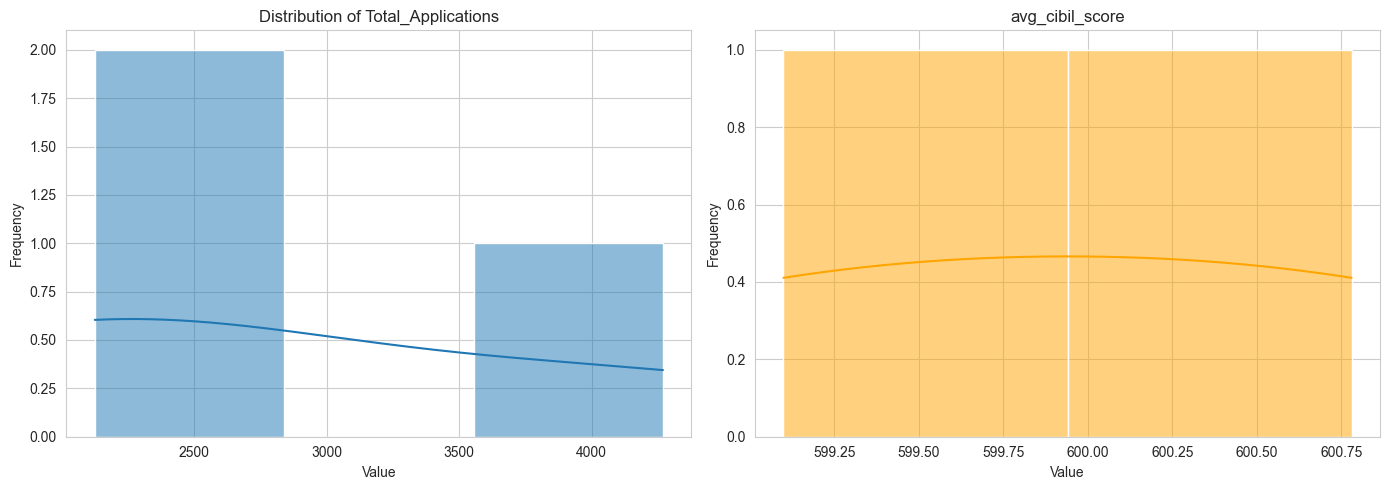

In [57]:

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram 1
sns.histplot(master_df['Total_Applications'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribution of Total_Applications')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Histogram 2
sns.histplot(master_df['avg_cibil_score'].dropna(), kde=True, ax=axes[1], color='orange')
axes[1].set_title('avg_cibil_score')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


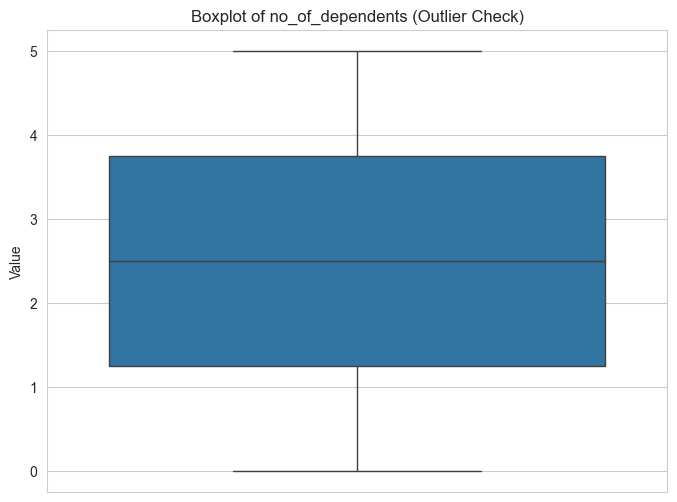

In [58]:

plt.figure(figsize=(8, 6))

# Simple Boxplot of a single numerical column
sns.boxplot(y=master_df['no_of_dependents'].dropna())
plt.title('Boxplot of no_of_dependents (Outlier Check)')
plt.ylabel('Value')
plt.show()


Correlation Matrix:
                       Approval_Rate_Percent  avg_cibil_score  avg_income  \
Approval_Rate_Percent                    1.0              NaN         NaN   
avg_cibil_score                          NaN              1.0   -1.000000   
avg_income                               NaN             -1.0    1.000000   
avg_loan_amount                          NaN              NaN    0.876195   

                       avg_loan_amount  
Approval_Rate_Percent              NaN  
avg_cibil_score                    NaN  
avg_income                    0.876195  
avg_loan_amount               1.000000  


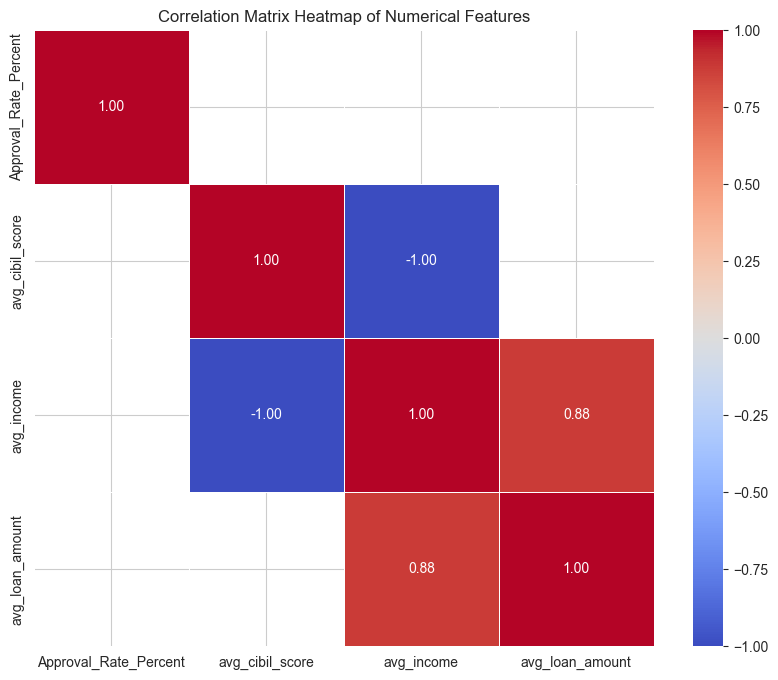

In [59]:
numerical_df = master_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap of Numerical Features')
plt.show()


# Task 3: Handle missing values and outliers

In [60]:
# Check the total count and percentage of missing values per column
missing_data = master_df.isnull().sum()
missing_percent = (missing_data / len(master_df)) * 100

missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percent (%)': missing_percent})
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))


                       Missing Count  Missing Percent (%)
Column1                        12796           100.000000
Total_Approved                 12795            99.992185
Total_Rejected                 12795            99.992185
Education                      12794            99.984370
Loan_Status                    12794            99.984370
Approved                       12794            99.984370
self_employed                  12794            99.984370
avg_cibil_score                12794            99.984370
Total_Count                    12794            99.984370
Approval_Rate_Percent          12793            99.976555
Total_Applications             12793            99.976555
total_applicants               12790            99.953110
no_of_dependents               12790            99.953110
avg_loan_amount                12790            99.953110
avg_income                     12788            99.937480
total_assets                    8556            66.864645
loan_status   

In [61]:

# --- FIX 1: Handle Numerical Missing Values ---

numerical_cols = master_df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    if master_df[col].isnull().any():
        median_val = master_df[col].median()
        # FIX: Assign the result back to the DataFrame directly
        master_df[col] = master_df[col].fillna(median_val)
        # We are also setting the option below to silence the 'silent_downcasting' warning
        pd.set_option('future.no_silent_downcasting', True)


# --- FIX 2: Handle Categorical Missing Values (Addresses both errors) ---

categorical_cols = master_df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    if master_df[col].isnull().any():
        # Check if the mode exists before trying to access index [0]
        if not master_df[col].mode().empty:
            mode_val = master_df[col].mode()[0]
            # FIX: Assign the result back to the DataFrame directly
            master_df[col] = master_df[col].fillna(mode_val)
        else:
            print(f"Warning: Column '{col}' is entirely empty or has no mode. Cannot impute with mode.")
            # Optional: fill empty columns with 'Unknown' or drop them entirely
            master_df[col] = master_df[col].fillna('Unknown')
            

print("\nMissing values handled successfully.")
print(master_df.isnull().sum())



Missing values handled successfully.
Approval_Rate_Percent    0
Approved                 0
Column1                  0
Education                0
Loan_Status              0
Risk_Level               0
Total_Applications       0
Total_Approved           0
Total_Count              0
Total_Rejected           0
avg_cibil_score          0
avg_income               0
avg_loan_amount          0
income_annum             0
income_rank              0
loan_amount              0
loan_id                  0
loan_status              0
no_of_dependents         0
self_employed            0
total_applicants         0
total_assets             0
dtype: int64


In [62]:
def identify_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [63]:

target_column = 'loan_amount' 

if target_column in master_df.columns and pd.api.types.is_numeric_dtype(master_df[target_column]):
    outlier_data, lower_b, upper_b = identify_outliers_iqr(master_df, target_column)
    
    print(f"Number of outliers in '{target_column}': {len(outlier_data)}")
    print(f"Lower bound: {lower_b}, Upper bound: {upper_b}")
    print(outlier_data[[target_column]].head()) # Display first few outliers


In [64]:
# Assuming 'master_df' is your DataFrame and 'your_numerical_column' is the target column name

target_column = 'loan_amount' # Make sure this is correctly set to your actual column name

# Check if the column is numerical and exists before proceeding
if target_column in master_df.columns and pd.api.types.is_numeric_dtype(master_df[target_column]):
    
    # 1. Calculate Q1, Q3, and IQR right here in your main script
    Q1 = master_df[target_column].quantile(0.25)
    Q3 = master_df[target_column].quantile(0.75)
    IQR = Q3 - Q1
    
    # 2. Calculate the lower and upper bounds (NOW 'lower_b' and 'upper_b' are defined)
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    
    print(f"Bounds calculated: Lower={lower_b}, Upper={upper_b}")
    
    # 3. Perform the capping operation using the defined bounds
    master_df[target_column] = master_df[target_column].clip(lower_b, upper_b)
    
    # 4. Verify the max/min values are now within bounds
    print(f"New max value after capping: {master_df[target_column].max()}")
    print(f"New min value after capping: {master_df[target_column].min()}")

else:
    print(f"Error: Column '{target_column}' is missing or not numerical. Check your column name.")



Error: Column 'loan_amount' is missing or not numerical. Check your column name.


In [65]:
# capping:
master_df[target_column] = master_df[target_column].clip(lower_b, upper_b)
# Verify the max/min values are now within bounds
print(f"New max value after capping: {master_df[target_column].max()}")


NameError: name 'lower_b' is not defined

# Task 4: Encode categorical variables

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [67]:
categorical_cols = master_df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Columns to encode: {categorical_cols}")

Columns to encode: ['Approved', 'Column1', 'Education', 'Loan_Status', 'Risk_Level', 'Total_Applications', 'Total_Approved', 'Total_Count', 'Total_Rejected', 'income_annum', 'income_rank', 'loan_amount', 'loan_id', 'loan_status', 'no_of_dependents', 'self_employed', 'total_applicants', 'total_assets']


In [68]:
# Create the encoder instance
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' avoids multicollinearity issues

# Fit and transform the data
# We select only the columns we need to encode
encoded_features = encoder.fit_transform(master_df[categorical_cols])

# Create a DataFrame from the encoded features with meaningful column names
feature_names = encoder.get_feature_names_out(input_features=categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Combine the new encoded DataFrame with the original master_df
# First, drop the original categorical columns
master_df_encoded = master_df.drop(columns=categorical_cols)

# Reset indices to ensure smooth concatenation if needed (especially after previous drops/filters)
master_df_encoded = master_df_encoded.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

# Concatenate horizontally
master_df = pd.concat([master_df_encoded, encoded_df], axis=1)

print("\nOne-Hot Encoding complete.")
print(master_df.info())
print(master_df.head())



One-Hot Encoding complete.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12796 entries, 0 to 12795
Columns: 5622 entries, Approval_Rate_Percent to total_assets_90700000
dtypes: float64(5622)
memory usage: 548.9 MB
None
   Approval_Rate_Percent  avg_cibil_score  avg_income  avg_loan_amount  \
0                  62.22           599.94  5047189.77      15118819.31   
1                  62.22           599.94  5047189.77      15118819.31   
2                  62.45           599.94  5047189.77      15118819.31   
3                  61.98           599.94  5047189.77      15118819.31   
4                  62.22           599.94  5047189.77      15118819.31   

   Approved_1339  Education_Not Graduate  Loan_Status_Rejected  \
0            0.0                     0.0                   0.0   
1            0.0                     0.0                   1.0   
2            1.0                     0.0                   0.0   
3            0.0                     1.0                   0.0   
4

# Task 5: Build logistic regression model to predict loan approval 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [70]:
# Define your target variable (y)
y = master_df['loan_status_Rejected']

# Define your features (X) by dropping the target variable from the DataFrame
X = master_df.drop('loan_status_Rejected', axis=1)


In [71]:
print(master_df['loan_status_Rejected'].value_counts())

loan_status_Rejected
0.0    11207
1.0     1589
Name: count, dtype: int64


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 10236
Testing samples: 2560


In [73]:
# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
# The 'liblinear' solver is good for small to medium datasets

# Train the model
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


# Task 6: Evaluate model using accuracy, precision, recall 

In [74]:
y_pred = model.predict(X_test)


Model Accuracy: 87.58%


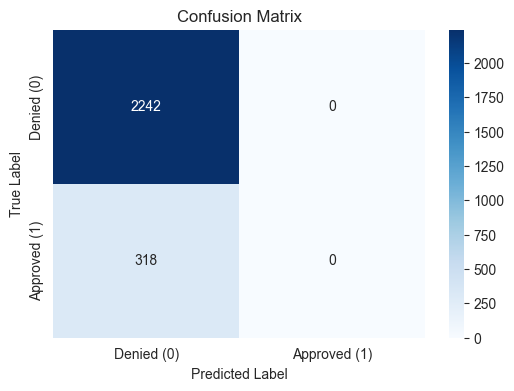


Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93      2242
         1.0       0.00      0.00      0.00       318

    accuracy                           0.88      2560
   macro avg       0.44      0.50      0.47      2560
weighted avg       0.77      0.88      0.82      2560



C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [75]:
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy*100:.2f}%")

# 2. Confusion Matrix (Visualizing correct vs. incorrect predictions)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Denied (0)', 'Approved (1)'], 
            yticklabels=['Denied (0)', 'Approved (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 3. Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Task 7: Use SHAP for interpretability 
We will use SHAP (SHapley Additive exPlanations), a powerful and modern method that explains individual predictions and the overall model structure.


In [76]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [77]:
import shap

In [78]:
# Create a SHAP explainer for the logistic regression model
# We use the 'explainer.expected_value' and 'explainer.shap_values' for consistency
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values for the test set
# This might take a moment depending on the size of your test set
shap_values = explainer.shap_values(X_test)

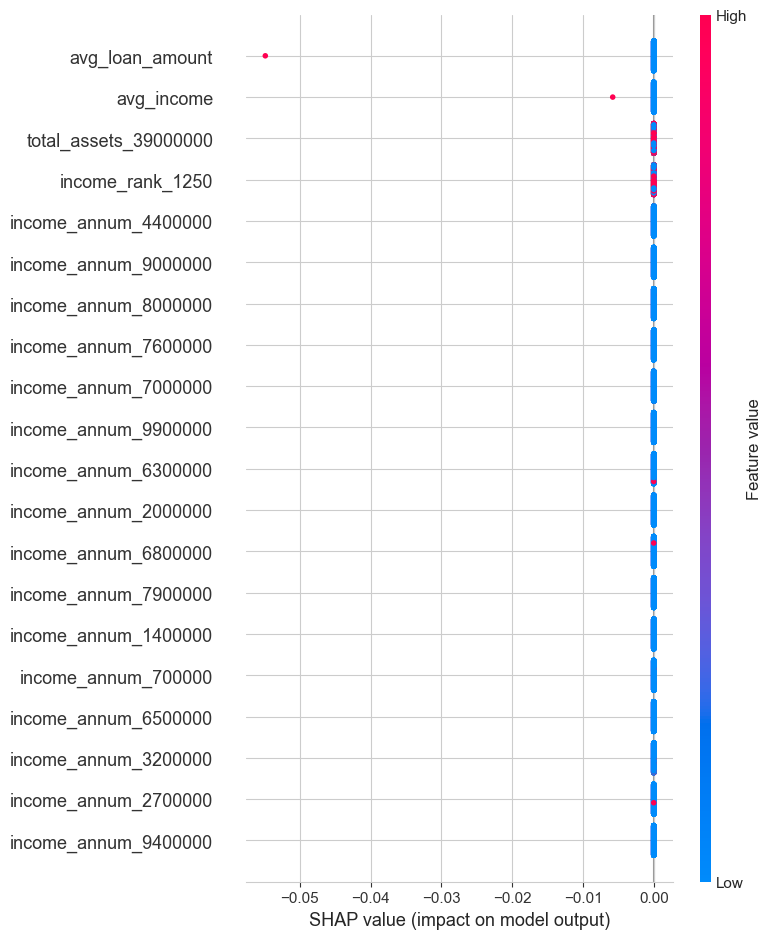

In [79]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)
plt.show()

In [80]:
# Select the index of the observation you want to explain (e.g., the 5th test sample)
sample_index = 5

# Visualize the explanation for this single prediction
shap.initjs() # required for interactive JS visualization in Jupyter
shap.force_plot(
    explainer.expected_value, 
    shap_values[sample_index], 
    X_test.iloc[sample_index],
    feature_names=X_test.columns
)

# Task 8: Generate risk scores for each applicant

In [81]:
# Generate prediction probabilities
# model.predict_proba returns an array where the first column is P(class 0/Denied) 
# and the second column is P(class 1/Approved)
probabilities = model.predict_proba(X_test)

# Extract the probability of approval (Class 1) as our 'risk score'
# Higher score = higher chance of approval / lower risk of default (depending on your y-mapping)
approval_scores = probabilities[:, 1] 

In [85]:
# Create a results DataFrame with the actual outcome, predicted outcome, and the score
results_df = pd.DataFrame({
    'Actual_Status': y_test,
    'Predicted_Status': model.predict(X_test),
    'Approval_Score': approval_scores
})

# Add applicant IDs or key features back for context
results_df = results_df.join(X_test[['avg_cibil_score']]) 

# Display the scores
print(results_df.head(10))


       Actual_Status  Predicted_Status  Approval_Score  avg_cibil_score
7494             0.0               0.0        0.124169           599.94
9118             1.0               0.0        0.124169           599.94
8786             0.0               0.0        0.124169           599.94
8308             0.0               0.0        0.124169           599.94
5870             0.0               0.0        0.124169           599.94
2839             0.0               0.0        0.124169           599.94
4432             0.0               0.0        0.124169           599.94
10358            1.0               0.0        0.124169           599.94
3506             0.0               0.0        0.124169           599.94
10290            1.0               0.0        0.124169           599.94


In [86]:
def assign_risk_tier(score):
    if score >= 0.8:
        return 'Low Risk (High Approval Chance)'
    elif score >= 0.5:
        return 'Medium Risk (Moderate Approval Chance)'
    else:
        return 'High Risk (Low Approval Chance)'

results_df['Risk_Tier'] = results_df['Approval_Score'].apply(assign_risk_tier)

print("\nRisk Tiers Assigned:")
print(results_df[['Approval_Score', 'Risk_Tier']].head(10))



Risk Tiers Assigned:
       Approval_Score                        Risk_Tier
7494         0.124169  High Risk (Low Approval Chance)
9118         0.124169  High Risk (Low Approval Chance)
8786         0.124169  High Risk (Low Approval Chance)
8308         0.124169  High Risk (Low Approval Chance)
5870         0.124169  High Risk (Low Approval Chance)
2839         0.124169  High Risk (Low Approval Chance)
4432         0.124169  High Risk (Low Approval Chance)
10358        0.124169  High Risk (Low Approval Chance)
3506         0.124169  High Risk (Low Approval Chance)
10290        0.124169  High Risk (Low Approval Chance)


# Task 9: Export model predictions to CSV

In [87]:
output_filename = 'loan_approval_predictions.csv'

try:
    results_df.to_csv(output_filename, index=False)
    print(f"Successfully exported predictions to '{output_filename}'")
except Exception as e:
    print(f"An error occurred during export: {e}")

Successfully exported predictions to 'loan_approval_predictions.csv'


In [88]:
# Verification Step
verification_df = pd.read_csv(output_filename)
print("\nVerification of the exported CSV file:")
print(verification_df.head())


Verification of the exported CSV file:
   Actual_Status  Predicted_Status  Approval_Score  avg_cibil_score  \
0            0.0               0.0        0.124169           599.94   
1            1.0               0.0        0.124169           599.94   
2            0.0               0.0        0.124169           599.94   
3            0.0               0.0        0.124169           599.94   
4            0.0               0.0        0.124169           599.94   

                         Risk_Tier  
0  High Risk (Low Approval Chance)  
1  High Risk (Low Approval Chance)  
2  High Risk (Low Approval Chance)  
3  High Risk (Low Approval Chance)  
4  High Risk (Low Approval Chance)  


# Task 10: Prepare final dataset for Power BI dashboard

In [89]:

# Combine X_train and X_test back together, maintaining their index
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Ensure they are sorted by index to align correctly
X_combined = X_combined.sort_index()
y_combined = y_combined.sort_index()

# Create a full results DataFrame including all historical actuals
full_results_df = X_combined.copy()
full_results_df['Actual_Status'] = y_combined

full_probabilities = model.predict_proba(X_combined)
full_results_df['Approval_Score'] = full_probabilities[:, 1]


In [90]:
final_power_bi_df = full_results_df.rename(columns={
    'loan_id': 'Loan ID',
    'no_of_dependents': 'Number of Dependents',
    'income_annum': 'Annual Income (USD)',
    'loan_amount': 'Loan Amount (USD)',
    'loan_term': 'Loan Term (Time String)',
    'cibil_score': 'CIBIL Score',
    'loan_status': 'Original Loan Status',
    'Actual_Status': 'Model Verified Status',
    'Approval_Score': 'Approval Probability Score',
    'education_Graduate': 'Education: Graduate'
})

# Optional: Add the Risk Tier function defined in the 'Generate risk scores' step if desired
def assign_risk_tier(score):
    if score >= 0.8: return 'Low Risk'
    elif score >= 0.5: return 'Medium Risk'
    else: return 'High Risk'

final_power_bi_df['Risk Tier'] = final_power_bi_df['Approval Probability Score'].apply(assign_risk_tier)

# Final formatting: remove spaces from columns for easier coding in Power BI/DAX
final_power_bi_df.columns = final_power_bi_df.columns.str.replace(' ', '_').str.lower()


In [91]:
final_output_filename = 'power_bi_master_dashboard_data.csv'

final_power_bi_df.to_csv(final_output_filename, index=False)

print(f"\nFinal dataset ready for Power BI: '{final_output_filename}'")
print(final_power_bi_df.info())
print(final_power_bi_df.head())


Final dataset ready for Power BI: 'power_bi_master_dashboard_data.csv'
<class 'pandas.core.frame.DataFrame'>
Index: 12796 entries, 0 to 12795
Columns: 5624 entries, approval_rate_percent to risk_tier
dtypes: float64(5623), object(1)
memory usage: 549.1+ MB
None
   approval_rate_percent  avg_cibil_score  avg_income  avg_loan_amount  \
0                  62.22           599.94  5047189.77      15118819.31   
1                  62.22           599.94  5047189.77      15118819.31   
2                  62.45           599.94  5047189.77      15118819.31   
3                  61.98           599.94  5047189.77      15118819.31   
4                  62.22           599.94  5047189.77      15118819.31   

   approved_1339  education_not_graduate  loan_status_rejected  \
0            0.0                     0.0                   0.0   
1            0.0                     0.0                   1.0   
2            1.0                     0.0                   0.0   
3            0.0            

# Completed